In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten , Input

In [2]:
# Dataset
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

In [4]:
#Normalizing the data
x_train , x_test = x_train / 255 , x_test / 255

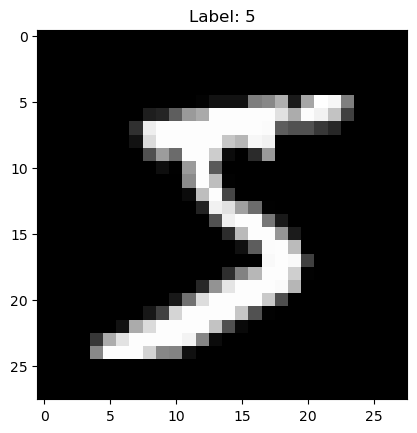

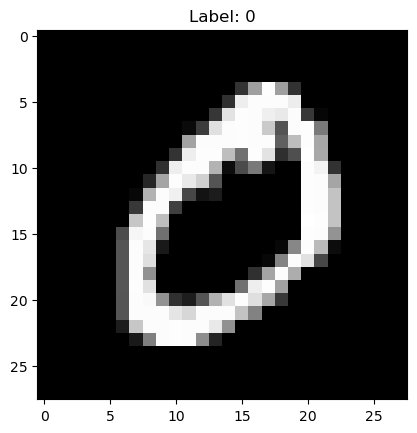

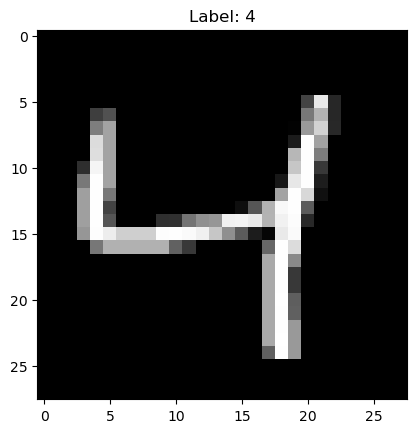

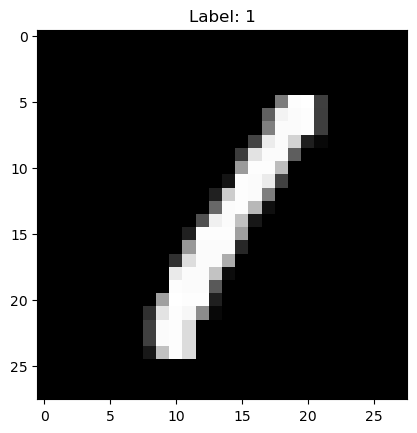

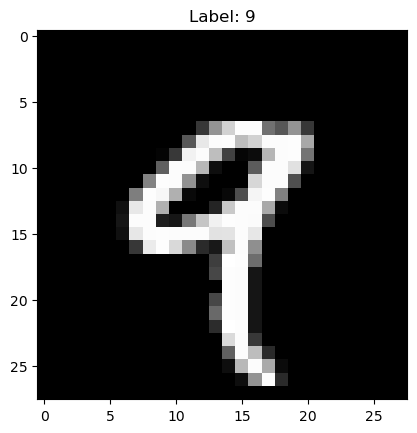

In [5]:
#Displaying some of the images
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.show()


In [6]:
#Neural Network model
model = Sequential([
    Input(shape=(28, 28, 1)),  # Specify the input shape
    Flatten(),
    Dense(units=120, activation="relu"),
    Dense(units=80, activation="relu"),
    Dense(units=10, activation="linear")])

In [7]:
#Compiling the model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
              loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [8]:
#Training the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6883 - loss: 1.1376 - val_accuracy: 0.9191 - val_loss: 0.2882
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9197 - loss: 0.2877 - val_accuracy: 0.9358 - val_loss: 0.2247
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9356 - loss: 0.2247 - val_accuracy: 0.9458 - val_loss: 0.1922
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9465 - loss: 0.1881 - val_accuracy: 0.9524 - val_loss: 0.1716
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9520 - loss: 0.1665 - val_accuracy: 0.9574 - val_loss: 0.1525
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9600 - loss: 0.1418 - val_accuracy: 0.9586 - val_loss: 0.1422
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9654 - loss: 0.1222 - val_accuracy: 0.9618 - val_loss: 0.1358
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9685 - loss: 0.1124 - 

In [23]:
#Predictions
logits = model(x_test)
f_x = tf.nn.softmax(logits)
predictions = tf.argmax(f_x, axis=1)
predictions_np = predictions.numpy()

In [24]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.9611 - loss: 0.1263
Test Loss: 0.11186289042234421
Test Accuracy: 0.9666000008583069


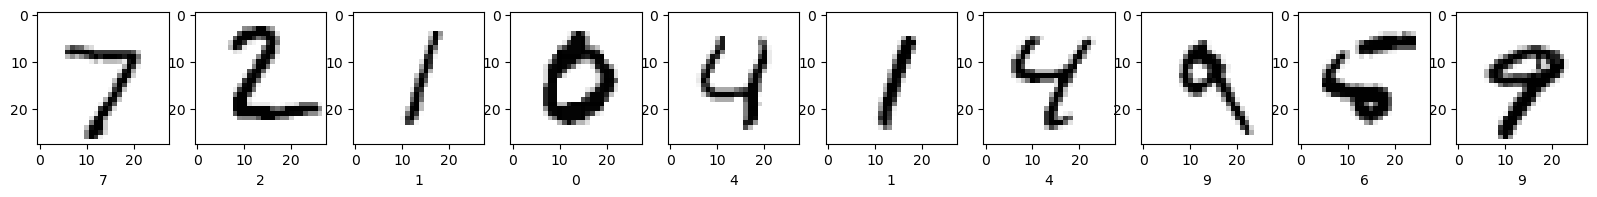

In [32]:
#testing
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(2, 10, i+1)  # Create a subplot for each image
    plt.imshow(x_test[i], cmap=plt.cm.binary)  # Display the image
    plt.xlabel(predictions_np[i])  # Display the predicted label
plt.show()

In [34]:
#Saving the model
model.save('my_model.keras')
